Coletamos os dados de ações dos 50 ativos mais negociados no Brasil e vamos analisar a frequência de cada dígito na primeira e segunda casa 

In [1]:
%matplotlib widget

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_excel("data/data.xlsx")
intervalo = df.iloc[2:48 , 1:251]


first_digit = [0,0,0,0,0,0,0,0,0]
second_digit = [0,0,0,0,0,0,0,0,0,0]
digitos = [0,1,2,3,4,5,6,7,8,9]
digits = [1,2,3,4,5,6,7,8,9]
conjunta = {1:[0]*10,2:[0]*10,3:[0]*10,4:[0]*10,5:[0]*10,6:[0]*10,7:[0]*10,8:[0]*10,9:[0]*10}
total = 0

# contar a frequencia de cada digito
for index, row in intervalo.iterrows():
    for col, value in row.items():

        total += 1
        number = str(value).replace('.','')

        first = int(number[0])
        first_digit[first - 1] += 1
        
        if len(number)> 1:
            second = int(number[1])
            second_digit[second] += 1
            conjunta[first][second] += 1


Transformar em porcentagem

In [14]:
first_digit_pctg = [round((i*100)/total , 2) for i in first_digit]
second_digit_pctg = [round((i*100)/total , 2) for i in second_digit]

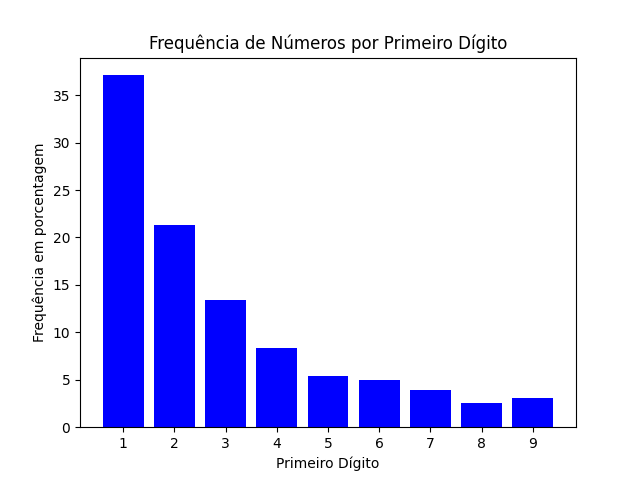

In [15]:
plt.figure()
plt.bar(range(1,10), first_digit_pctg, color='blue')
plt.title("Frequência de Números por Primeiro Dígito")
plt.xlabel("Primeiro Dígito")
plt.ylabel("Frequência em porcentagem")
plt.xticks(digits)
# Exibindo o gráfico
plt.show()

Comparação com a distribuição logarítimica da Lei de Benford

A lei de Benford diz que a frequência dos primentiros dígitos segue aproximadamente a relação logarítimca:
$$F_a = log\left(\frac{a+1}{a}\right)$$
onde $F_a$ é a frequência do dígito $a$ na primeira posição dos números observados 

In [13]:
#plotando a distribuicao logaritmica da lei de benford em porcentagens
from math import log10

first_digit_benford = []
for i in digits:
    first_digit_benford.append(round(log10((i+1)/i) * 100 , 2))

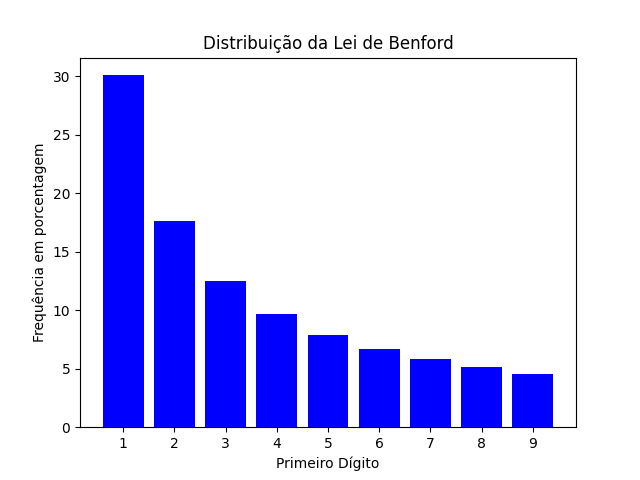

In [6]:
# grafico
plt.figure()
plt.bar(range(1,10), first_digit_benford, color='blue')
plt.title("Distribuição da Lei de Benford")
plt.xlabel("Primeiro Dígito")
plt.ylabel("Frequência em porcentagem")
plt.xticks(digits)
# Exibindo o gráfico
plt.show()

Comparando o experimento com a distribuição da Lei de Benford

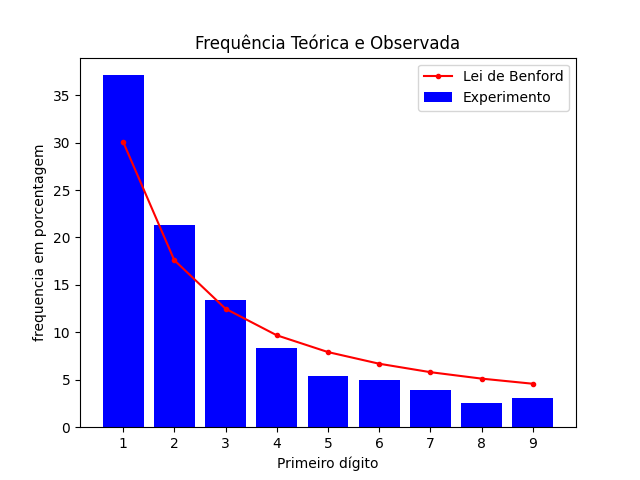

In [7]:
plt.figure()
plt.bar(digits, first_digit_pctg, label="Experimento", color="blue",)

# Plotando o segundo conjunto de dados (linha vermelha)
plt.plot(digits, first_digit_benford, label="Lei de Benford", color="red", marker=".")

# Adicionando título, rótulos aos eixos e uma legenda
plt.title("Frequência Teórica e Observada")
plt.xlabel("Primeiro dígito")
plt.ylabel("frequencia em porcentagem")
plt.xticks(digits)
plt.legend()  # Exibe a legenda

plt.show()

A Lei de Benford também afirma que a frequência dos demais dígitos seguem a distribuição:
$$F_b \approx 0.1$$
e em específico, os segundos dígitos seguem essa frequência:
$ 0: 0.120, 1: 0.114 , 2: 0.108 , 3: 0.104 , 4: 0.100 , 5: 0.097 , 6: 0.093 , 7: 0.090 , 8: 0.088 , 9: 0.085 $

[12.0, 11.4, 10.8, 10.4, 10.0, 9.7, 9.3, 9.0, 8.8, 8.5]


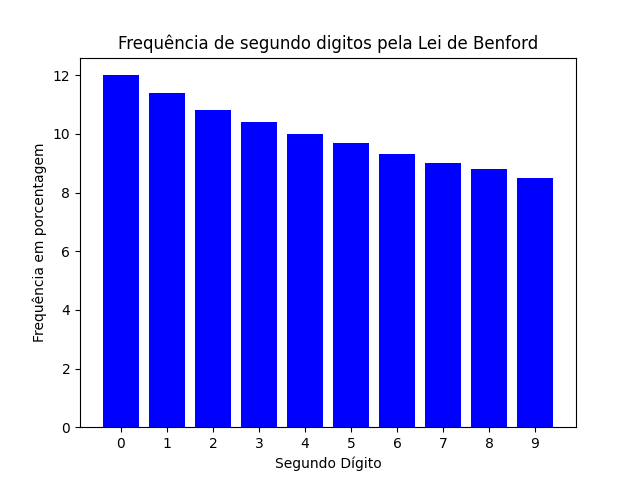

In [8]:
# analisar a frequencia dos segundos digitos

sec = {0: 0.120, 1: 0.114 , 2: 0.108 , 3: 0.104 , 4: 0.100 , 5: 0.097 , 6: 0.093 , 7: 0.090 , 8: 0.088 , 9: 0.085}
second_digit_benford = [round(i*100 , 2) for i in sec.values()]
plt.figure()
plt.bar(range(0,10), second_digit_benford, color='blue')
plt.title("Frequência de segundo digitos pela Lei de Benford")
plt.xlabel("Segundo Dígito")
plt.ylabel("Frequência em porcentagem")
plt.xticks(digitos)
# Exibindo o gráfico
plt.show()

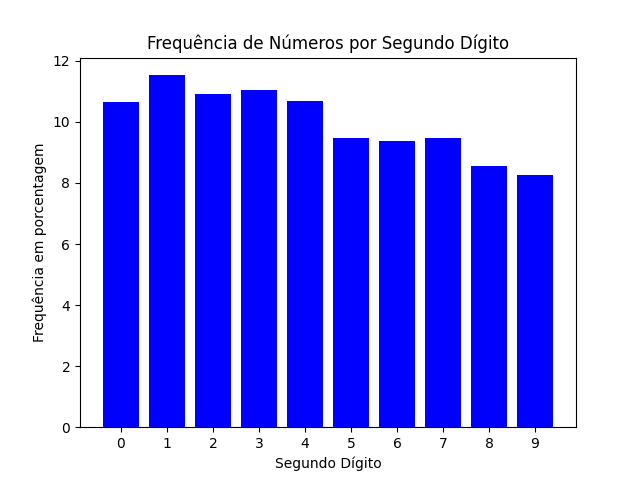

In [9]:
plt.figure()
plt.bar(range(0,10), second_digit_pctg, color='blue')
plt.title("Frequência de Números por Segundo Dígito")
plt.xlabel("Segundo Dígito")
plt.ylabel("Frequência em porcentagem")
plt.xticks(digitos)
# Exibindo o gráfico
plt.show()

Comparando os resultados dos experimentos com a distribuição da Lei de Benford

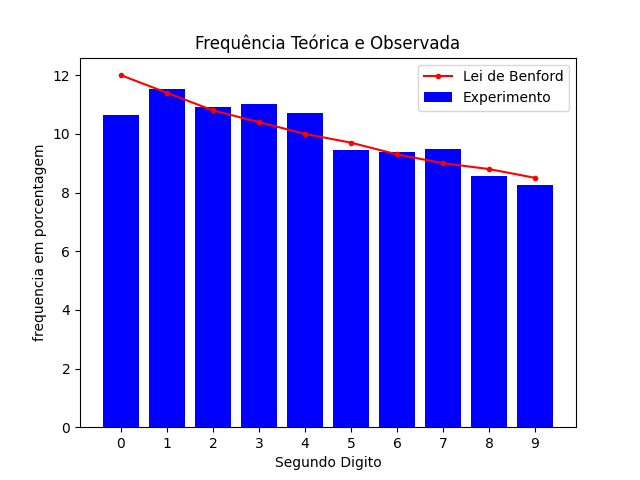

In [10]:
plt.figure()
plt.bar(digitos, second_digit_pctg, label="Experimento", color="blue",)

# Plotando o segundo conjunto de dados (linha vermelha)
plt.plot(digitos, second_digit_benford, label="Lei de Benford", color="red", marker=".")

# Adicionando título, rótulos aos eixos e uma legenda
plt.title("Frequência Teórica e Observada")
plt.xlabel("Segundo Digito")
plt.ylabel("frequencia em porcentagem")
plt.xticks(digitos)
plt.legend()  # Exibe a legend

Distribuição de segundos digitos $b$ precedidos pelo primeiro digito $a$

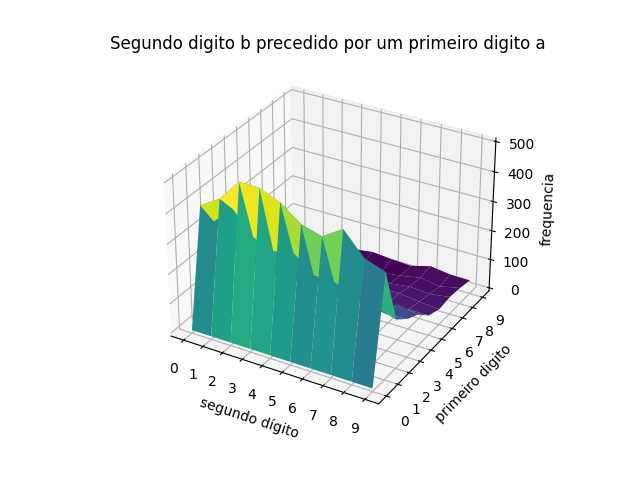

In [17]:

from mpl_toolkits.mplot3d import Axes3D

matrix = [[0,0,0,0,0,0,0,0,0,0]]
for i in conjunta:
    matrix.append(conjunta[i])
matrix = np.array(matrix)


x = np.arange(matrix.shape[0])
y = np.arange(matrix.shape[1])

x, y = np.meshgrid(x, y) 

# Criando o gráfico
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotando a superfície
ax.plot_surface(x, y, matrix, cmap='viridis')

# Adicionando título e rótulos
ax.set_title("Segundo digito b precedido por um primeiro digito a")
ax.set_xlabel("segundo dígito")
ax.set_ylabel("primeiro digito")
ax.set_zlabel("frequencia")
ax.set_xticks(digitos)
ax.set_yticks(digitos)

# Exibindo o gráfico
plt.show()

A Lei de Benford afirma que a frequência $F_b$ de um segundo dígito $a$, seguido de um primeiro dígito $a$ é:
$$F_b = \frac{log(\frac{ab+1}{ab})}{log(\frac{a+1}{a})}$$ 

Plotando o mesmo gráfico que o anterior com os dados da distribuição da Lei de Benford

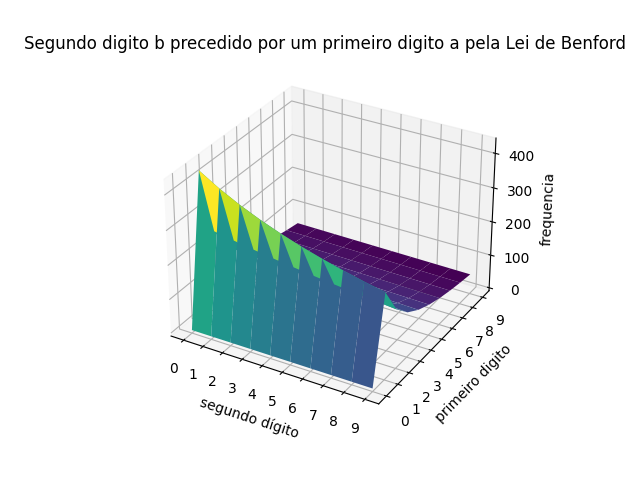

In [19]:
conjunta_benford = [[0]*10]

for i in range(9):
    line = []
    for j in range(10):
        ab = (i+1)*10 + j+1
        fb = log10((ab +1)/ab)/log10((i+2)/(i+1))
        line.append(round(fb*first_digit_benford[i]*total/100 , 2))

    conjunta_benford.append(line)
conjunta_benford= np.array(conjunta_benford)

x = np.arange(conjunta_benford.shape[0])
y = np.arange(conjunta_benford.shape[1])

x, y = np.meshgrid(x, y)  

# Criando o gráfico
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotando a superfície
ax.plot_surface(x, y, conjunta_benford, cmap='viridis')

# Adicionando título e rótulos
ax.set_title("Segundo digito b precedido por um primeiro digito a pela Lei de Benford ")
ax.set_xlabel("segundo dígito")
ax.set_ylabel("primeiro digito")
ax.set_zlabel("frequencia")
ax.set_xticks(digitos)
ax.set_yticks(digitos)

# Exibindo o gráfico
plt.show()

In [20]:
import plotly.graph_objects as go

Refazendo o ultimo e penultimo grafico com plotly

In [21]:
fig = go.Figure(data=[go.Surface(z=matrix)])

digitous = [str(i) for i in digitos]

fig.update_layout(
    title='Segundo digito b precedido por um primeiro digito a',
    scene=dict(
        xaxis_title='segundo digito',
        yaxis_title='primeiro digito',
        zaxis_title='frequencia'
    ),
    xaxis=dict(
        tickmode = "array",
        tickvals=digitos,
        ticktext= digitous
    ),
    yaxis=dict(
        tickmode="array",
        tickvals=digitos,
        ticktext= digitous
    )
)

# Exibir o gráfico
fig.show()

In [22]:
fig = go.Figure(data=[go.Surface(z=conjunta_benford)])

digitous = [str(i) for i in digitos]

fig.update_layout(
    title='Segundo digito b precedido por um primeiro digito a pela Lei de Benford',
    scene=dict(
        xaxis_title='segundo digito',
        yaxis_title='primeiro digito',
        zaxis_title='frequencia'
    ),
    xaxis=dict(
        tickvals=digitos,
        ticktext= digitous
    ),
    yaxis=dict(
        tickvals=digitos,
        ticktext= digitous
    )
)

# Exibir o gráfico
fig.show()